In [1]:
# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()

# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import bs4
from pprint import pprint

In [2]:
import requests
resp = requests.get(
    "https://www.basketball-reference.com/players/b/balllo01/shooting/2021")
resp

<Response [200]>

In [3]:
from bs4 import BeautifulSoup, Comment
content = BeautifulSoup(resp.content, 'html.parser')
print(content.prettify()[0:500])

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/deploy/www" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202205101" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <script async="true" type="text/javascript">
    (fun


In [4]:
comments = content.find_all(text=lambda text:isinstance(text, Comment))
comments[:5]

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ']

In [5]:
shots_html = comments
shots_html

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ',
 ' CSS END ',
 ' JS START ',
 ' JS END ',
 ' include:end ="/inc/klecko_header_bbr.html_f" ',
 ' HeaderSeoSocial ',
 ' HeaderSeoSocial:END ',
 ' tiles, touch, favicons ',
 '[if IE]>\n    <link rel="shortcut icon"                                href="https://d2p3bygnnzw9w3.cloudfront.net/req/202205101/favicons/bbr/favicon.ico"><![endif]',
 ' tiles, touch, favicons:end ',
 ' ad code: begin ',
 ' ad code:end ',
 ' ul.user ',
 ' div#nav ',
 ' div.search ',
 ' div#header ',
 ' div.media-item ',
 ' all other pages ',
 ' div#meta ',
 ' div#fs_fs_300_atf  ',
 ' /div.#fs_fs_300_atf ',
 ' div#info ',
 ' div#fs_fs_728_atf  ',
 ' /div.#fs_fs_728_atf ',
 ' div#srcom ',
 ' div#inner_nav ',
 ' fs_general_header ',
 ' div#fs_fs_general_header  ',
 ' /div.#fs_fs_g

In [6]:
# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']
PHI =[x for x in teams if x['full_name'] == 'Philadelphia 76ers'][0]
PHI_id = PHI['id']

In [7]:
from nba_api.stats.endpoints import leaguegamefinder

#this time we convert it to a dataframe in the same line of code
GSW_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=GSW_id).get_data_frames()[0]

In [8]:
from basketball_reference_web_scraper import client

In [9]:
from basketball_reference_web_scraper import client

client.team_box_scores(day=3, month=5, year=2022)

[{'team': <Team.MILWAUKEE_BUCKS: 'MILWAUKEE BUCKS'>,
  'outcome': <Outcome.LOSS: 'LOSS'>,
  'minutes_played': 240,
  'made_field_goals': 34,
  'attempted_field_goals': 73,
  'made_three_point_field_goals': 3,
  'attempted_three_point_field_goals': 18,
  'made_free_throws': 15,
  'attempted_free_throws': 23,
  'offensive_rebounds': 5,
  'defensive_rebounds': 32,
  'assists': 16,
  'steals': 4,
  'blocks': 5,
  'turnovers': 16,
  'personal_fouls': 19,
  'points': 86},
 {'team': <Team.BOSTON_CELTICS: 'BOSTON CELTICS'>,
  'outcome': <Outcome.WIN: 'WIN'>,
  'minutes_played': 240,
  'made_field_goals': 38,
  'attempted_field_goals': 80,
  'made_three_point_field_goals': 20,
  'attempted_three_point_field_goals': 43,
  'made_free_throws': 13,
  'attempted_free_throws': 15,
  'offensive_rebounds': 7,
  'defensive_rebounds': 33,
  'assists': 28,
  'steals': 10,
  'blocks': 5,
  'turnovers': 11,
  'personal_fouls': 23,
  'points': 109},
 {'team': <Team.GOLDEN_STATE_WARRIORS: 'GOLDEN STATE WARRIO

In [10]:
from basketball_reference_web_scraper import client

client.players_advanced_season_totals(season_end_year=2022)

[{'slug': 'achiupr01',
  'name': 'Precious Achiuwa',
  'positions': [<Position.CENTER: 'CENTER'>],
  'age': 22,
  'team': <Team.TORONTO_RAPTORS: 'TORONTO RAPTORS'>,
  'games_played': 73,
  'minutes_played': 1725,
  'player_efficiency_rating': 12.7,
  'true_shooting_percentage': 0.503,
  'three_point_attempt_rate': 0.259,
  'free_throw_attempt_rate': 0.217,
  'offensive_rebound_percentage': 8.7,
  'defensive_rebound_percentage': 21.7,
  'total_rebound_percentage': 14.9,
  'assist_percentage': 6.9,
  'steal_percentage': 1.1,
  'block_percentage': 2.3,
  'turnover_percentage': 11.3,
  'usage_percentage': 18.5,
  'offensive_win_shares': 0.4,
  'defensive_win_shares': 2.1,
  'win_shares': 2.5,
  'win_shares_per_48_minutes': 0.07,
  'offensive_box_plus_minus': -2.0,
  'defensive_box_plus_minus': -0.6,
  'box_plus_minus': -2.6,
  'value_over_replacement_player': -0.2,
  'is_combined_totals': False},
 {'slug': 'adamsst01',
  'name': 'Steven Adams',
  'positions': [<Position.CENTER: 'CENTER'>],

In [11]:
shots_string = str(shots_html)

In [12]:
shots_string

'[\' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) \', \' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) \', \' include:start ="/inc/klecko_header_bbr.html_f" \', \' no:cookie fast load the css.           \', \' CSS start \', \' CSS END \', \' JS START \', \' JS END \', \' include:end ="/inc/klecko_header_bbr.html_f" \', \' HeaderSeoSocial \', \' HeaderSeoSocial:END \', \' tiles, touch, favicons \', \'[if IE]>\\n    <link rel="shortcut icon"                                href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204185/favicons/bbr/favicon.ico"><![endif]\', \' tiles, touch, favicons:end \', \' ad code: begin \', \' ad code:end \', \' ul.user \', \' div#nav \', \' div.search \', \' div#header \', \' div.media-item \', \' all other pages \', \' div#meta \', \' div#fs_fs_300_atf  \', \' /div.#fs_fs_300_atf \', \' div#info \', \' div#fs_fs_728_atf  \', \' /div.#fs_fs_728_atf \', \' div#srcom \', \' div#inner_nav \', \' fs_general_header \', \' div#fs_fs_g

In [13]:
import re

shot_loc_text = re.findall('top:\d+px;left:\d+px', shots_string)
shot_loc_text[:5]

['top:194px;left:450px',
 'top:307px;left:176px',
 'top:146px;left:18px',
 'top:40px;left:0px',
 'top:38px;left:294px']

In [14]:
shot_loc = []
for i in range(len(shot_loc_text)):
    shot = shot_loc_text[i]
    nums = re.findall('\d+', shot)
    shot_loc.append([nums[0],nums[1]])
shot_loc[:5]

[['194', '450'], ['307', '176'], ['146', '18'], ['40', '0'], ['38', '294']]

In [15]:
len(shot_loc)

697

In [16]:
shot_res = re.findall('remaining<br>[^\d]+', shots_string)
shot_res = [shot_res[i][13:-1] for i in range(len(shot_res))]
shot_res[:5]

['Made', 'Missed', 'Missed', 'Missed', 'Missed']

In [17]:
shot_opp = re.findall('LAL [av][ts] \w+', shots_string)
shot_opp = [shot_opp[i][7:] for i in range(len(shot_opp))]
shot_opp[:5]

[]

In [18]:
# Data and NBA API
import pandas as pd
import numpy as np

from scipy.stats import norm, gaussian_kde, percentileofscore

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# For Shot Chart
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

sns.set_style('white')
sns.set_color_codes()

In [19]:
def get_player_shotchartdetail(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2021-22
    """
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [75]:
player_shotchart_df, league_avg = get_player_shotchartdetail('Devin Booker', '2021-22')
player_shotchart_df2, league_avg = get_player_shotchartdetail('Chris Paul', '2021-22')
player_shotchart_df = pd.concat([player_shotchart_df,player_shotchart_df2])

In [76]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100012,12,1626164,Devin Booker,1610612756,Phoenix Suns,1,10,53,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,183,170,1,0,20211020,PHX,DEN
1,Shot Chart Detail,0022100012,32,1626164,Devin Booker,1610612756,Phoenix Suns,1,9,23,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-126,239,1,0,20211020,PHX,DEN
2,Shot Chart Detail,0022100012,65,1626164,Devin Booker,1610612756,Phoenix Suns,1,5,57,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,28,-21,280,1,1,20211020,PHX,DEN
3,Shot Chart Detail,0022100012,75,1626164,Devin Booker,1610612756,Phoenix Suns,1,4,47,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,17,-123,118,1,0,20211020,PHX,DEN
4,Shot Chart Detail,0022100012,256,1626164,Devin Booker,1610612756,Phoenix Suns,2,3,12,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,5,1,1,20211020,PHX,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Shot Chart Detail,0022101210,516,101108,Chris Paul,1610612756,Phoenix Suns,4,10,53,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,12,77,94,1,0,20220408,UTA,PHX
732,Shot Chart Detail,0022101210,523,101108,Chris Paul,1610612756,Phoenix Suns,4,10,12,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-81,237,1,0,20220408,UTA,PHX
733,Shot Chart Detail,0022101210,555,101108,Chris Paul,1610612756,Phoenix Suns,4,8,44,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,16,99,134,1,0,20220408,UTA,PHX
734,Shot Chart Detail,0022101210,591,101108,Chris Paul,1610612756,Phoenix Suns,4,5,42,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,14,92,108,1,1,20220408,UTA,PHX


In [77]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

In [78]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [79]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [80]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [81]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

In [82]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

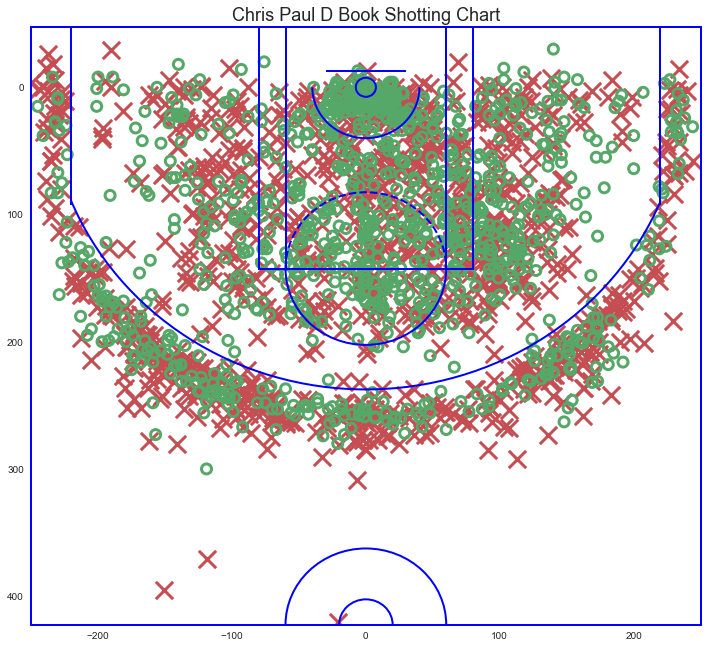

FG%:  0.475 (1025-2157)


In [83]:
shot_chart(player_shotchart_df, title="Chris Paul D Book Shotting Chart")
plt.show()
print("FG%: ", "{0:.3f}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))

In [84]:
def sized_hexbin(ax, hc, hc2, cmap, norm):
    offsets = hc.get_offsets()
    orgpath = hc.get_paths()[0]
    verts = orgpath.vertices
    values1 = hc.get_array()
    values2 = hc2.get_array()
    ma = values1.max()
    patches = []

    for offset,val in zip(offsets,values1):
        # Adding condition for minimum size 
        # offset is the respective position of each hexagons
        
        # remove 0 to compare frequency without 0s
        filtered_list = list(filter(lambda num: num != 0, values1))
        
        # we also skip frequency counts that are 0s
        # this is to discount hexbins with no occurences
        # default value hexagons are the frequencies
        if (int(val) == 0):
            continue
        elif (percentileofscore(filtered_list, val) < 33.33):
            #print(percentileofscore(values1, val))
            #print("bot")
            v1 = verts*0.3 + offset
        elif (percentileofscore(filtered_list, val) > 69.99):
            #print(percentileofscore(values1, val))
            #print("top")
            v1 = verts + offset
        else:
            #print("mid")
            v1 = verts*0.6 + offset
        
        path = Path(v1, orgpath.codes)
        patch = PathPatch(path)
        patches.append(patch)

    pc = PatchCollection(patches, cmap=cmap, norm=norm)
    # sets color
    # so hexbin with C=data['FGP']
    pc.set_array(values2)

    ax.add_collection(pc)
    hc.remove()
    hc2.remove()

def hexmap_chart(data, league_avg, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="white",
               court_color="#1a477b", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):
    
    LA = league_avg.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
    LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
    player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
    player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
    player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  

    data = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')
    
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor(court_color)

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    x = data['LOC_X']
    y = data['LOC_Y']
        
    # for diverging color map
    colors = ['#2b7cb6', '#abd9e9', '#ffffbf', '#fdaf61', '#d7191c', '#dddddd' ]
    cmap = ListedColormap(colors)
    # The 5 colors are separated by -9, -3, 0, 3, 9
    boundaries = [-np.inf, -9, -3, 0, 3, 9, np.inf]
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)   
    
    # first hexbin required for bincount
    # second hexbin for the coloring of each hexagons
    hexbin = ax.hexbin(x, y, gridsize=40, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
    hexbin2 = ax.hexbin(x, y, C=data['FGP'], gridsize=40, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
    sized_hexbin(ax, hexbin, hexbin2, cmap, norm) 
    
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

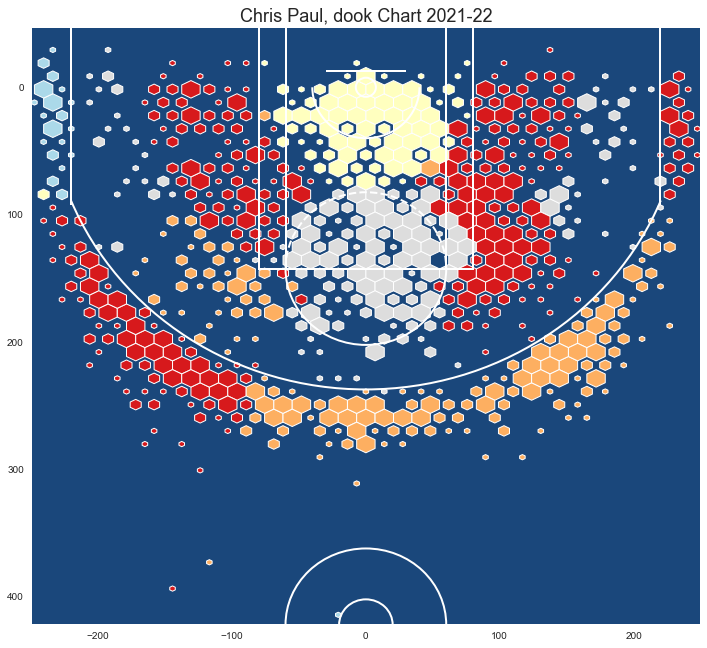

In [85]:
hexmap_chart(player_shotchart_df, league_avg, title="Chris Paul, dook Chart 2021-22")
plt.show()

In [86]:
def shot_zones(data, league_avg, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="black",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, ax=None, despine=False, **kwargs):
    
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor(court_color)

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)
    
    # draws the court
    # set shotzone to True
    draw_court(ax, color=line_color, lw=court_lw, shotzone=True, outer_lines=outer_lines)
    
    LA = league_avg.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
    LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
    print(LA)
    
    player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
    player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
    player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  
    print(player_vs_league)

    data = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    #ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='b', s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

                                         FGA    FGM       FGP
SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
Back Court(BC)        Back Court Shot    475     15  0.031579
Center(C)             16-24 ft.         4165   1743  0.418487
                      24+ ft.          16368   5613  0.342925
                      8-16 ft.         13865   6149  0.443491
                      Less Than 8 ft.  86338  50953  0.590157
Left Side Center(LC)  16-24 ft.         3972   1632  0.410876
                      24+ ft.          24924   8511  0.341478
Left Side(L)          16-24 ft.         1680    613  0.364881
                      24+ ft.          11377   4371  0.384196
                      8-16 ft.          7211   2972  0.412148
Right Side Center(RC) 16-24 ft.         4043   1575  0.389562
                      24+ ft.          23120   8171  0.353417
Right Side(R)         16-24 ft.         1609    614  0.381603
                      24+ ft.          10091   3855  0.382024
        

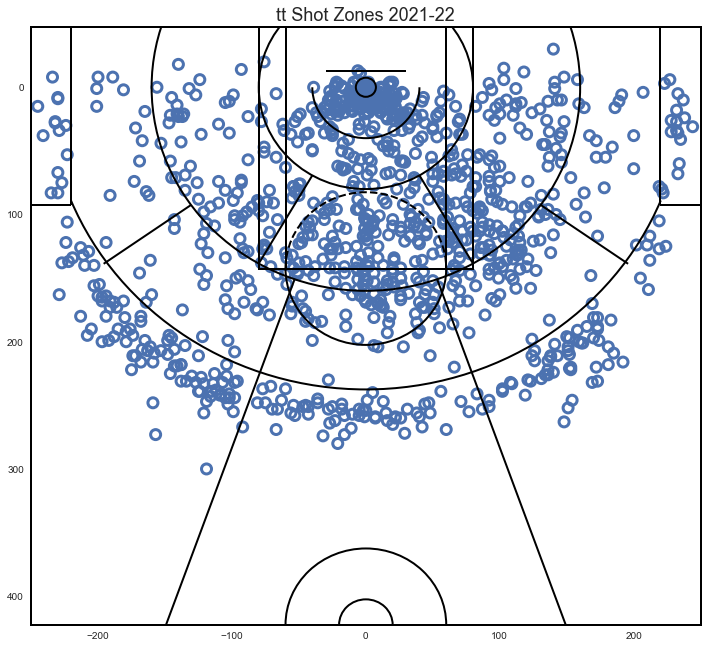

In [87]:
shot_zones(player_shotchart_df, league_avg, title="tt Shot Zones 2021-22")

In [88]:
def heatmap(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="white",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)
    
    x = data['LOC_X']
    y = data['LOC_Y']
    
    sns.kdeplot(x, y, shade=True, cmap='inferno', ax=ax, **kwargs)

    ax.scatter(x, y, facecolors='w', s=2, linewidths=0.1, **kwargs)
    
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

/Users/bobbypaul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: cannot reindex from a duplicate axis

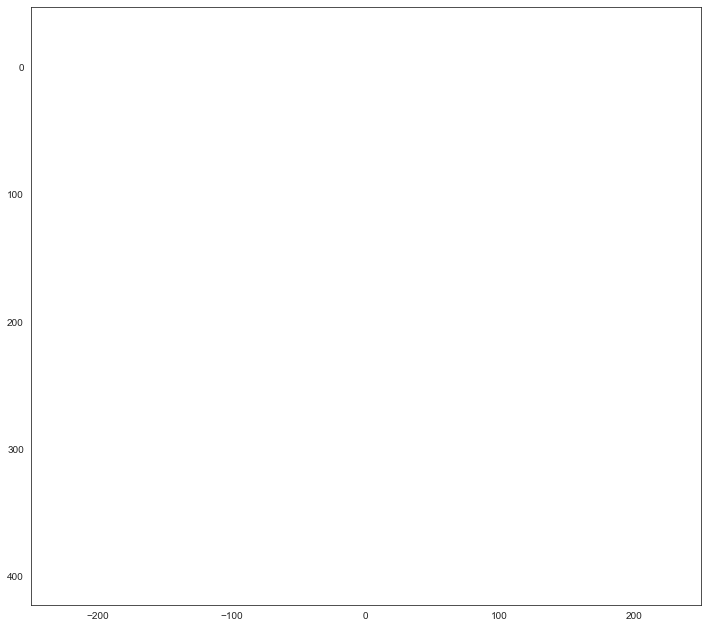

In [91]:
heatmap(player_shotchart_df)